# Keşifsel Veri Analizi

## Tek Değişkenli Analiz

Bu ödevde ABD Eğitim Sistemi'ne ait verileri inceleyemeye devam edeceksiniz. Bu veri kümesinde eyalet bazında yıllık bir çok veri bulunmaktadır. Bu verilerin açıklamalarına yine Kaggle'dan ulaşabilirsiniz.

Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings


warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 100
#plt.rcParams['figure.figsize'] = (8,5.5)
pd.options.display.float_format = '{:.3f}'.format

# custom font defs
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 12}
axis_font  = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 10}

# import csv with needed columns
#usecols = ['PRIMARY_KEY', 'STATE', 'YEAR', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE', 
#           'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
# import from clean csv data
#df = pd.read_csv('states_all_clean.csv', usecols = usecols)



### Q1
Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

---
- 24 adet degisken vardir (24 column)
- 1632 adet veri noktasi vardir (1632 column)
- STATE degiskeni kategorik diger degiskenler sureklidir
- Eksik veri vardir degiskenlere gore dagilimi asagidadir

In [88]:
df = pd.read_csv('states_all_clean.csv')
df = df.set_index('PRIMARY_KEY')

dfi = pd.read_csv('states_all_clean_filled.csv')
dfi = dfi.set_index('PRIMARY_KEY')

dsa = dfi.copy()
print('\nDataframe genel yapisi: \n')
display(dfi.head())
print('\nDegiskenerin veri tipleri: \n')
print(df.info())
print('\nSatir (veri noktasi) sayisi  : \n\n%s' % dsa.shape[0])
print('\nEksik degerlerin degiskenlere gore dagilimi\n')
print(df.isnull().mean()*100)


Dataframe genel yapisi: 



,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,
1986_ALABAMA,ALABAMA,1986,725248.000,1217233.000,234201.000,728237.000,254795.000,1062563.000,744713.000,314580.000,...,56939.000,57261.000,45396.000,480291.000,198706.000,733735.000,208.328,252.188,207.964,258.860
1986_ALASKA,ALASKA,1986,109490.000,892987.000,56225.000,695608.000,141154.000,722083.000,315876.000,325356.000,...,8706.000,7313.000,6753.000,88820.000,31549.000,107848.000,208.328,252.188,207.964,258.860
1986_ARIZONA,ARIZONA,1986,537787.000,1840862.000,125378.000,738829.000,976655.000,2077062.000,780075.000,699533.000,...,40187.000,38060.000,35777.000,377361.000,119480.000,534538.000,208.328,252.188,207.964,258.860
1986_ARKANSAS,ARKANSAS,1986,172113.000,856538.000,130667.000,412151.000,313720.000,950017.000,561034.000,235357.000,...,32799.000,34053.000,28729.000,275869.000,129702.000,437438.000,208.328,252.188,207.964,258.860
1986_CALIFORNIA,CALIFORNIA,1986,4317630.000,13337032.000,995680.000,10252528.000,2088824.000,16189998.000,8633931.000,6102791.000,...,325902.000,304787.000,251281.000,3411785.000,1144171.000,4377989.000,208.328,252.188,207.964,258.860



Degiskenerin veri tipleri: 

<class 'pandas.core.frame.DataFrame'>
Index: 1632 entries, 1986_ALABAMA to 2017_WYOMING
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1632 non-null   object 
 1   YEAR                          1632 non-null   int64  
 2   ENROLL                        1224 non-null   float64
 3   TOTAL_REVENUE                 1275 non-null   float64
 4   FEDERAL_REVENUE               1275 non-null   float64
 5   STATE_REVENUE                 1275 non-null   float64
 6   LOCAL_REVENUE                 1275 non-null   float64
 7   TOTAL_EXPENDITURE             1275 non-null   float64
 8   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 9   SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 10  OTHER_EXPENDITURE             1224 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 12  GRADES_PK_G       

---
***Tanimlayici istatistikler***
- Eksik veriler doldurulduktan sonra tanimlayici istatistikler asagidadir
- Eksik  ve aykiri veriler giderildikten sonra tanimlayici istatistikler asagidadir(TOTAL_REVENUE ve TOTAL_EXPENDITURE icin)

Aykiri degerler giderildikten sonra TOTAL_REVENUE ve TOTAL_EXPENDITURE degiskenlerinin max ve ortalama degerlerindeki degisim gozlenmistir.

In [89]:
print('\nTanimlayici istatistikler (Eksik degerler doldurulduktan sonra) :\n')
display(dsa.describe(include='all'))

dsv = pd.read_csv('states_all_clean_filled.csv', usecols = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'])
dsv["winsorize_TOTAL_REVENUE"] = winsorize(dsv["TOTAL_REVENUE"], (0, 0.10))
dsv["winsorize_TOTAL_EXPENDITURE"] = winsorize(dsv["TOTAL_EXPENDITURE"], (0, 0.10))

print('\nTanimlayici istatistikler (Eksik ve aykiri degerler giderildikten sonra) :\n')
display(dsv.describe())


Tanimlayici istatistikler (Eksik degerler doldurulduktan sonra) :



,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1632,1632.000,1632.000,1632.000,1632.000,1632.000,1632.000,1632.000,1632.000,1632.000,...,1632.000,1632.000,1632.000,1632.000,1632.000,1632.000,1632.000,1632.000,1632.000,1632.000
unique,51,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,GEORGIA,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,32,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,2001.500,877110.867,8213406.999,677102.585,3793127.380,3743177.029,8308469.861,4314758.379,2427713.573,...,69166.508,68106.537,58420.871,565768.312,263058.715,913969.494,226.668,270.257,215.952,261.825
std,NaN,9.236,1034455.892,11298723.282,1073887.946,5407768.797,5259369.243,11473067.529,6041921.932,3223327.756,...,79957.990,77965.847,67438.531,648872.236,303428.427,1055892.947,12.596,11.843,6.752,5.151
min,NaN,1986.000,-2888.000,287292.000,5337.000,-4395504.000,13211.000,362361.000,201901.000,94370.000,...,4577.000,3371.000,2572.000,37698.000,11550.000,68449.000,187.135,232.832,178.558,236.379
25%,NaN,1993.750,211456.000,1863946.000,154946.750,907860.750,655163.000,1886047.000,995281.500,543927.000,...,18971.500,19594.250,16076.500,155657.250,75995.750,248083.250,216.974,262.554,208.606,258.860
50%,NaN,2001.500,612818.500,4303086.000,341537.500,2205797.500,1760385.000,4378149.500,2256021.500,1256867.500,...,49087.000,47880.000,39408.000,399526.500,180584.000,645805.000,227.277,271.368,216.776,260.640
75%,NaN,2009.250,985725.000,9568569.500,751814.250,4362340.000,4191897.000,9580595.000,5019835.750,2862724.250,...,78504.250,78976.000,69397.250,638142.500,296130.500,1043420.500,237.706,279.434,221.162,265.515



Tanimlayici istatistikler (Eksik ve aykiri degerler giderildikten sonra) :



,TOTAL_REVENUE,TOTAL_EXPENDITURE,winsorize_TOTAL_REVENUE,winsorize_TOTAL_EXPENDITURE
count,1632.000,1632.000,1632.000,1632.000
mean,8213406.999,8308469.861,6624508.619,6695275.847
std,11298723.282,11473067.529,6015468.243,6105188.115
min,287292.000,362361.000,287292.000,362361.000
25%,1863946.000,1886047.000,1863946.000,1886047.000
50%,4303086.000,4378149.500,4303086.000,4378149.500
75%,9568569.500,9580595.000,9568569.500,9580595.000
max,100186482.000,92274308.000,19393461.000,19812932.000


### Q2
Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

---
Toplam gelir ve harcamalar paralel ve duzenli olarak artmistir, ancak 2008 krizi sonrasi 2008-2013 yillari arasinda dusus ve duraklama gorulmektedir. 2013 sonrasi artis yeniden devam etmistir.

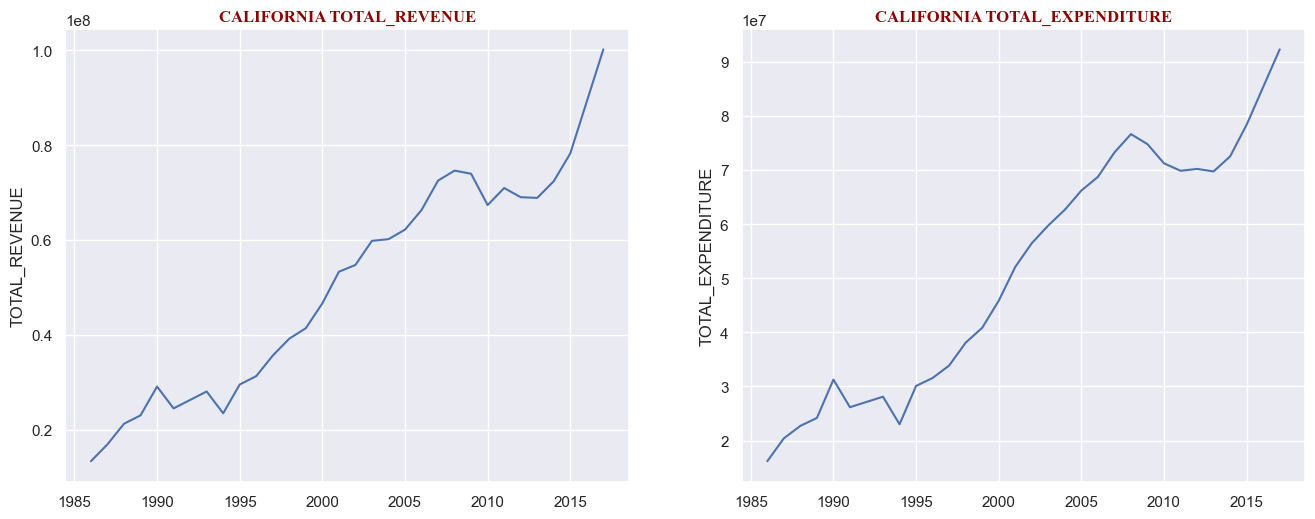

In [115]:
dfi = pd.read_csv('states_all_clean_filled.csv')
dfi = dfi.set_index('PRIMARY_KEY')
years = dfi.YEAR.unique()
sns.set(style="darkgrid")

states = ['CALIFORNIA']
columns = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']
i=1
plt.figure(figsize=(16,6))
for state in states:
    for column in columns:
        plt.subplot(len(states),len(columns),i)
        plt.title(state + ' '+ column , fontdict=title_font)
        sns.lineplot(years, dfi.loc[dfi['STATE']==state][column])
        i += 1

plt.show()


### Q3
Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

---
Matematik ve okuma notlarin ortalamalarina bakildiginda California eyaletinde matemetikte ogrenciler daha basarilidir. 

In [136]:
state = 'CALIFORNIA'

math4_series = dfi.loc[dfi['STATE']=='CALIFORNIA',['AVG_MATH_4_SCORE']].mean()
math8_series = dfi.loc[dfi['STATE']=='CALIFORNIA',['AVG_MATH_8_SCORE']].mean()

read4_series = dfi.loc[dfi['STATE']=='CALIFORNIA',['AVG_READING_4_SCORE']].mean()
read8_series = dfi.loc[dfi['STATE']=='CALIFORNIA',['AVG_READING_8_SCORE']].mean()

display(dfi.loc[dfi['STATE']=='CALIFORNIA',['AVG_MATH_4_SCORE']].mean())
display(dfi.loc[dfi['STATE']=='CALIFORNIA',['AVG_READING_4_SCORE']].mean())
display(dfi.loc[dfi['STATE']=='CALIFORNIA',['AVG_MATH_8_SCORE']].mean())
display(dfi.loc[dfi['STATE']=='CALIFORNIA',['AVG_READING_8_SCORE']].mean())

AVG_MATH_4_SCORE   225.308
dtype: float64

AVG_READING_4_SCORE   213.457
dtype: float64

AVG_MATH_8_SCORE   269.529
dtype: float64

AVG_READING_8_SCORE   261.207
dtype: float64

### Q4
Matematik ve okuma notlarının dağılımı nedir?

---
Matematik ve okuma notlari normal dagilim ozelligi gostermemektedir.

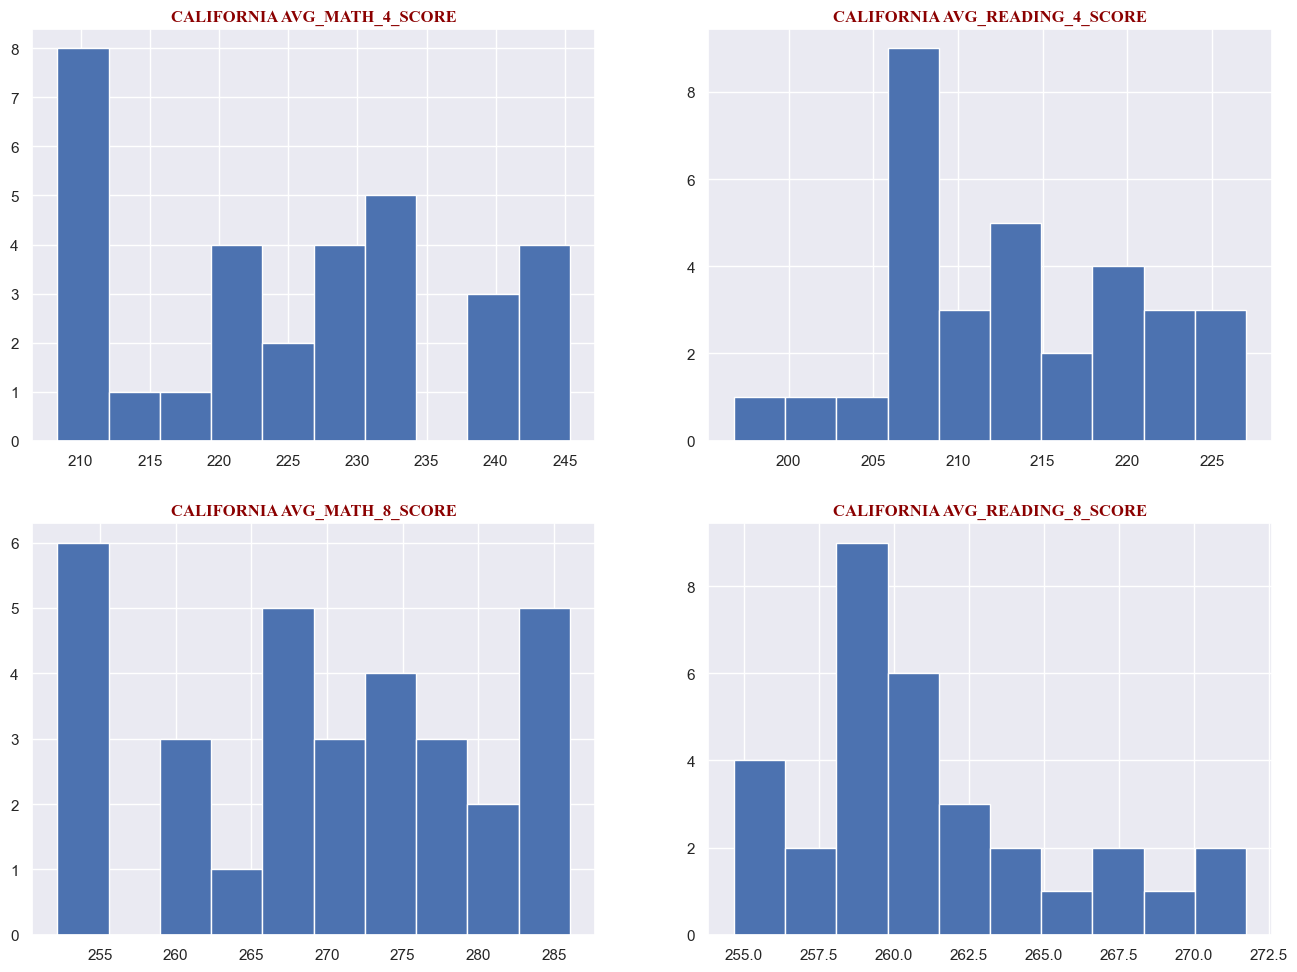

In [138]:
states = ['CALIFORNIA']
columns = ['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']
i=1
plt.figure(figsize=(16,12))
for state in states:
    for column in columns:
        plt.subplot(2,2,i)
        plt.title(state + ' '+ column , fontdict=title_font)
        plt.hist(dfi.loc[dfi['STATE']==state][column])
        i += 1

plt.show()

### Q5
Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

---
- Normal dagilima en yakin dagilim, lineer enterpolasyon ile eksik veriler tamamlandiginda elde edilmistir.
- Diger yontemlerde ise eksik veriler sabit bir deger olarak girildiginden dagilim grafiginde belli bir deger uzerinde yogunlasma oldugu gorulmektedir.

---
***Ortalama yontemi***

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
1986_CALIFORNIA,nan,nan,nan,nan
1987_CALIFORNIA,nan,nan,nan,nan
1988_CALIFORNIA,nan,nan,nan,nan
1989_CALIFORNIA,nan,nan,nan,nan
1990_CALIFORNIA,nan,nan,nan,nan
1991_CALIFORNIA,nan,nan,nan,nan
1992_CALIFORNIA,208.399,260.892,196.764,nan
1993_CALIFORNIA,nan,nan,nan,nan


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
2012_CALIFORNIA,nan,nan,nan,nan
2013_CALIFORNIA,233.654,275.901,212.546,260.448
2014_CALIFORNIA,nan,nan,nan,nan
2015_CALIFORNIA,231.549,275.325,212.678,258.768
2016_CALIFORNIA,nan,nan,nan,nan
2017_CALIFORNIA,232.263,276.638,215.422,262.521


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
1986_CALIFORNIA,234.797,278.461,218.898,263.683
1987_CALIFORNIA,234.797,278.461,218.898,263.683
1988_CALIFORNIA,234.797,278.461,218.898,263.683
1989_CALIFORNIA,234.797,278.461,218.898,263.683
1990_CALIFORNIA,234.797,278.461,218.898,263.683
1991_CALIFORNIA,234.797,278.461,218.898,263.683
1992_CALIFORNIA,208.399,260.892,196.764,263.683
1993_CALIFORNIA,234.797,278.461,218.898,263.683


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
2012_CALIFORNIA,234.797,278.461,218.898,263.683
2013_CALIFORNIA,233.654,275.901,212.546,260.448
2014_CALIFORNIA,234.797,278.461,218.898,263.683
2015_CALIFORNIA,231.549,275.325,212.678,258.768
2016_CALIFORNIA,234.797,278.461,218.898,263.683
2017_CALIFORNIA,232.263,276.638,215.422,262.521


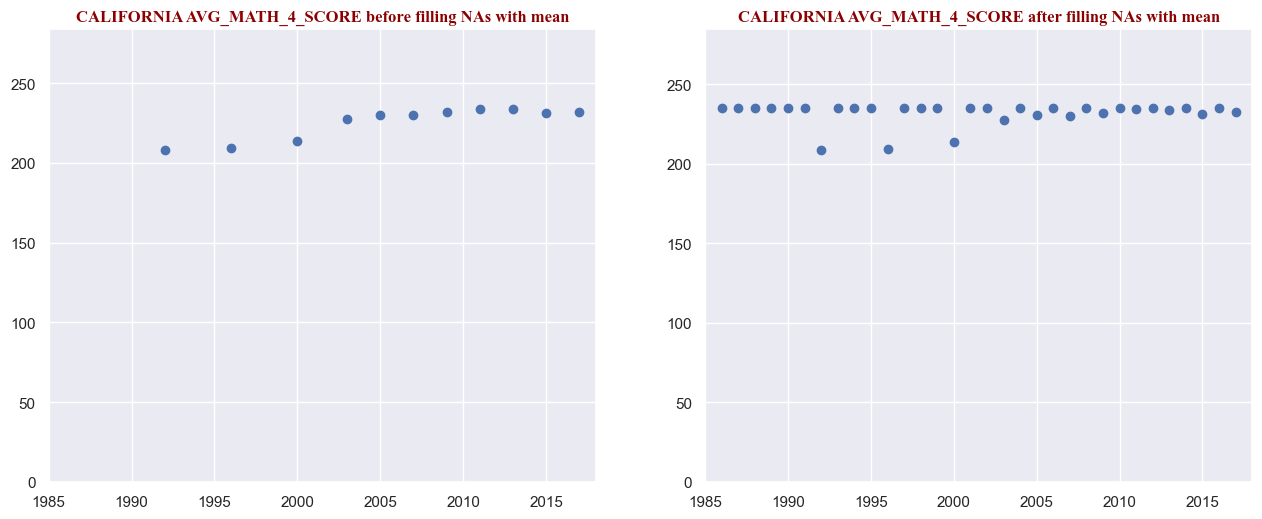

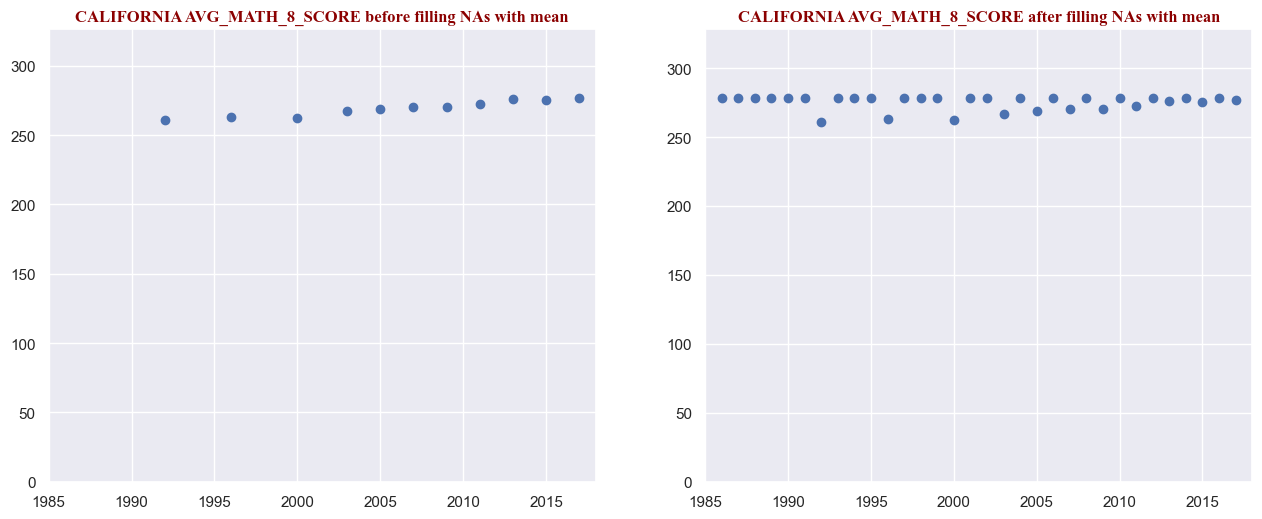

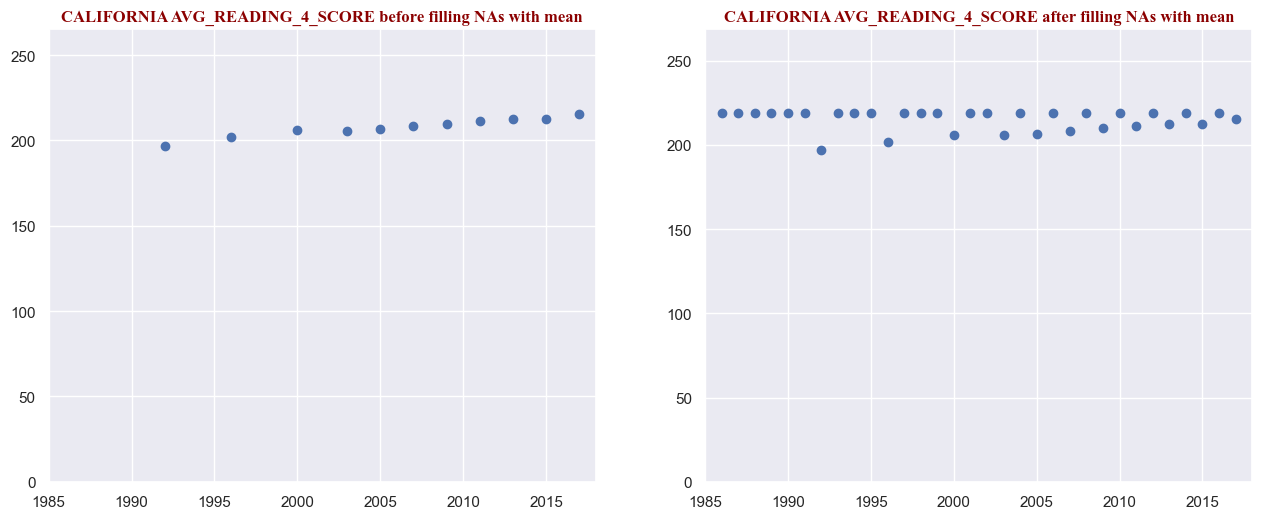

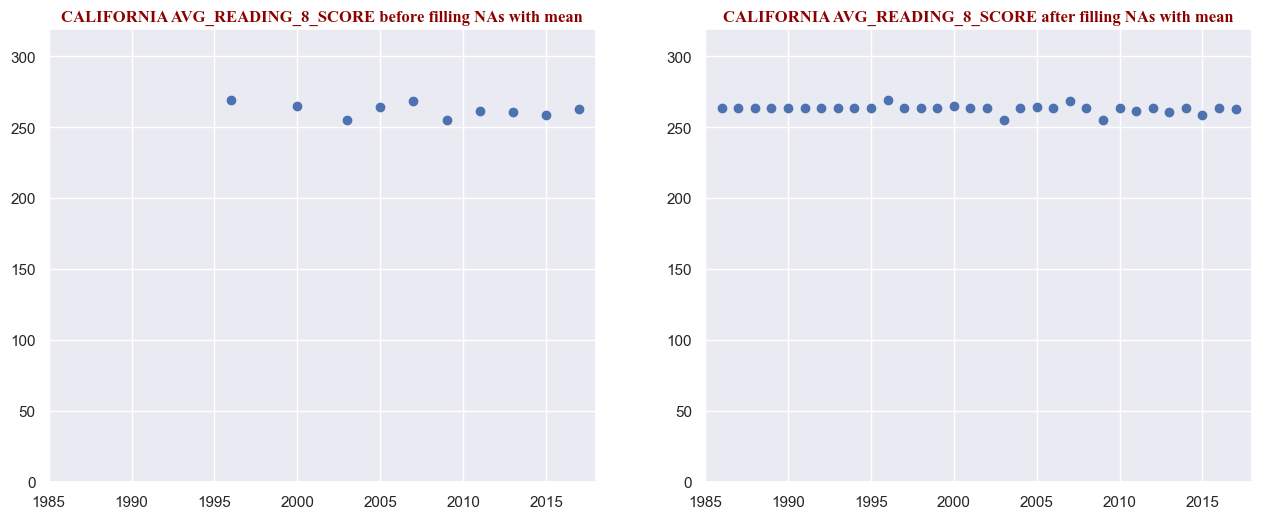

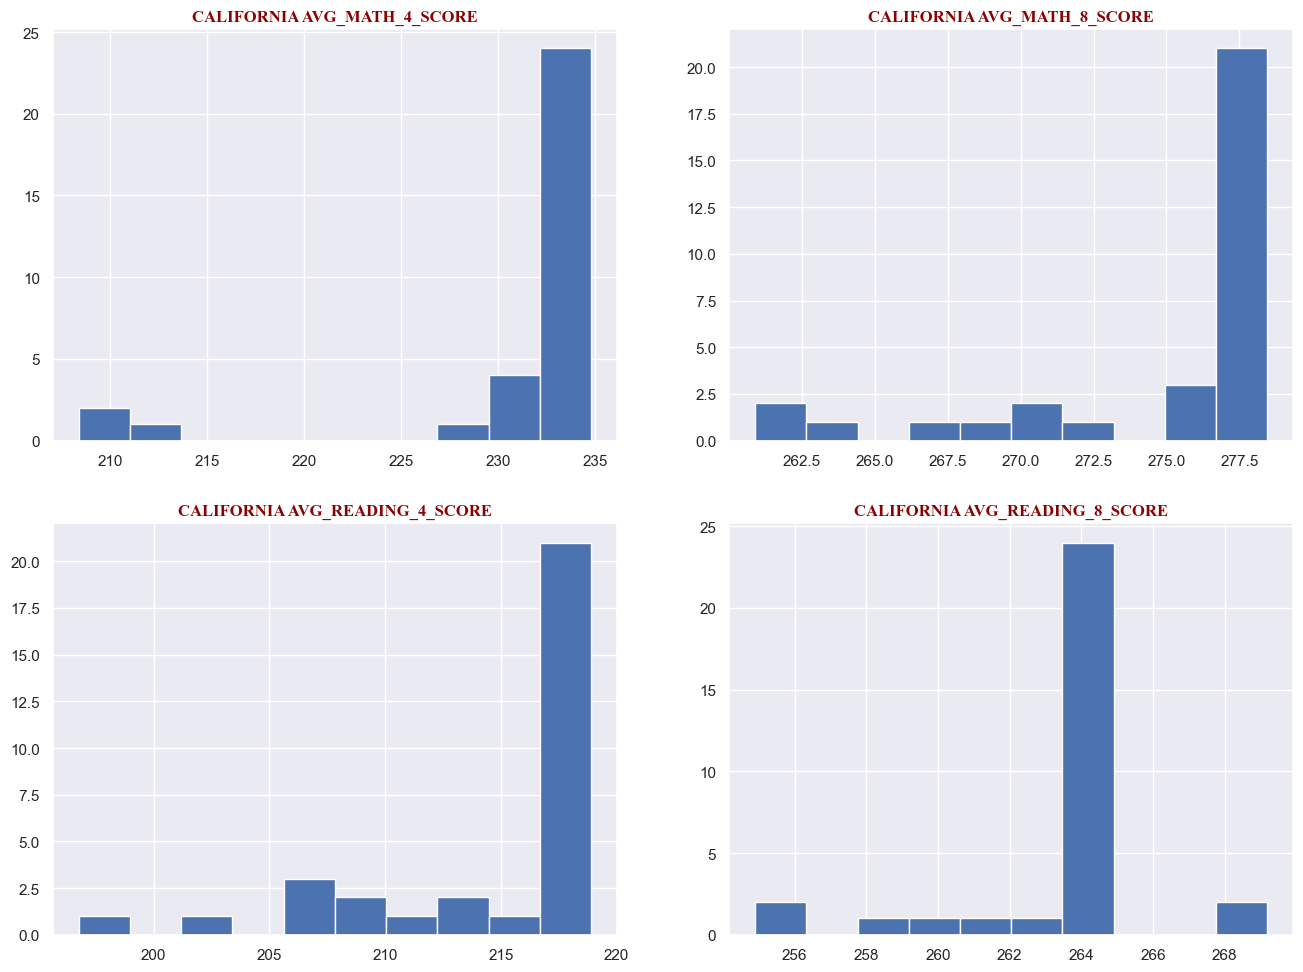

In [141]:
dmean = df.copy()
columns = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for column in columns:
    dmean[column].fillna(dmean[column].mean(),inplace=True)
    
display(df.loc[df['STATE']=='CALIFORNIA',columns].head(8))
display(df.loc[df['STATE']=='CALIFORNIA',columns].tail(6))
display(dmean.loc[dmean['STATE']=='CALIFORNIA',columns].head(8))
display(dmean.loc[dmean['STATE']=='CALIFORNIA',columns].tail(6))


x = df.YEAR.unique()
state = 'CALIFORNIA'

j=0
for column in columns: 
    y = [df.loc[df['STATE']==state, column],
         dmean.loc[dmean['STATE']==state, column]]
    plt.figure(figsize=(24,6))
    for i in range(2):  
        plt.subplot(1,3,i+1)
        if i ==0 :
            plt.title(state + ' '+ column + ' before filling NAs with mean', fontdict=title_font)            
        elif i==1 :
            plt.title(state + ' '+ column + ' after filling NAs with mean', fontdict=title_font)
        plt.axis(xmin = x[0]-1, xmax=x[-1]+1, ymin=0, ymax = y[i].max()+50)
        plt.scatter(x,y[i])
    plt.show() 

i=1
plt.figure(figsize=(16,12))
for column in columns:
        plt.subplot(2,2,i)
        plt.title(state + ' '+ column , fontdict=title_font)
        plt.hist(dmean.loc[dfi['STATE']==state][column])
        i += 1
plt.show()

    

---
***Median yontemi***

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
1986_CALIFORNIA,nan,nan,nan,nan
1987_CALIFORNIA,nan,nan,nan,nan
1988_CALIFORNIA,nan,nan,nan,nan
1989_CALIFORNIA,nan,nan,nan,nan
1990_CALIFORNIA,nan,nan,nan,nan
1991_CALIFORNIA,nan,nan,nan,nan
1992_CALIFORNIA,208.399,260.892,196.764,nan
1993_CALIFORNIA,nan,nan,nan,nan


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
2012_CALIFORNIA,nan,nan,nan,nan
2013_CALIFORNIA,233.654,275.901,212.546,260.448
2014_CALIFORNIA,nan,nan,nan,nan
2015_CALIFORNIA,231.549,275.325,212.678,258.768
2016_CALIFORNIA,nan,nan,nan,nan
2017_CALIFORNIA,232.263,276.638,215.422,262.521


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
1986_CALIFORNIA,237.265,280.620,220.442,265.023
1987_CALIFORNIA,237.265,280.620,220.442,265.023
1988_CALIFORNIA,237.265,280.620,220.442,265.023
1989_CALIFORNIA,237.265,280.620,220.442,265.023
1990_CALIFORNIA,237.265,280.620,220.442,265.023
1991_CALIFORNIA,237.265,280.620,220.442,265.023
1992_CALIFORNIA,208.399,260.892,196.764,265.023
1993_CALIFORNIA,237.265,280.620,220.442,265.023


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
2012_CALIFORNIA,237.265,280.620,220.442,265.023
2013_CALIFORNIA,233.654,275.901,212.546,260.448
2014_CALIFORNIA,237.265,280.620,220.442,265.023
2015_CALIFORNIA,231.549,275.325,212.678,258.768
2016_CALIFORNIA,237.265,280.620,220.442,265.023
2017_CALIFORNIA,232.263,276.638,215.422,262.521


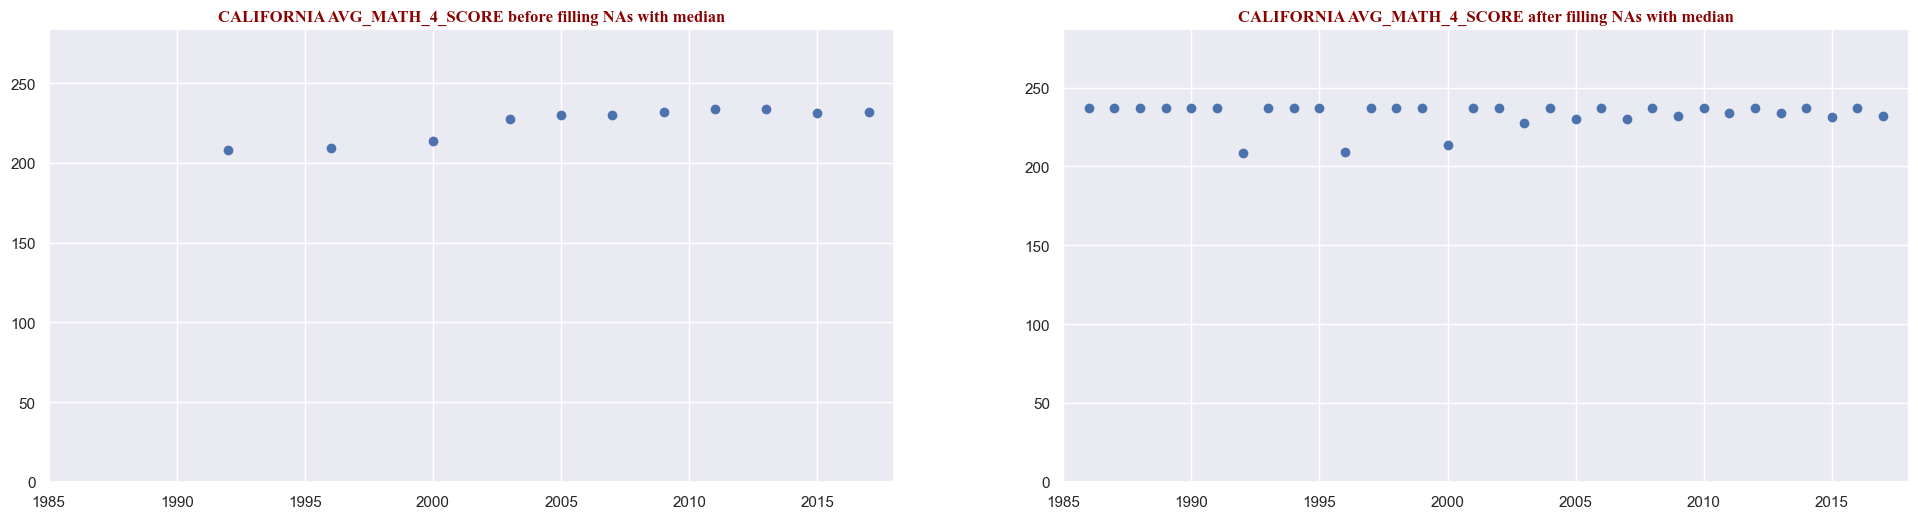

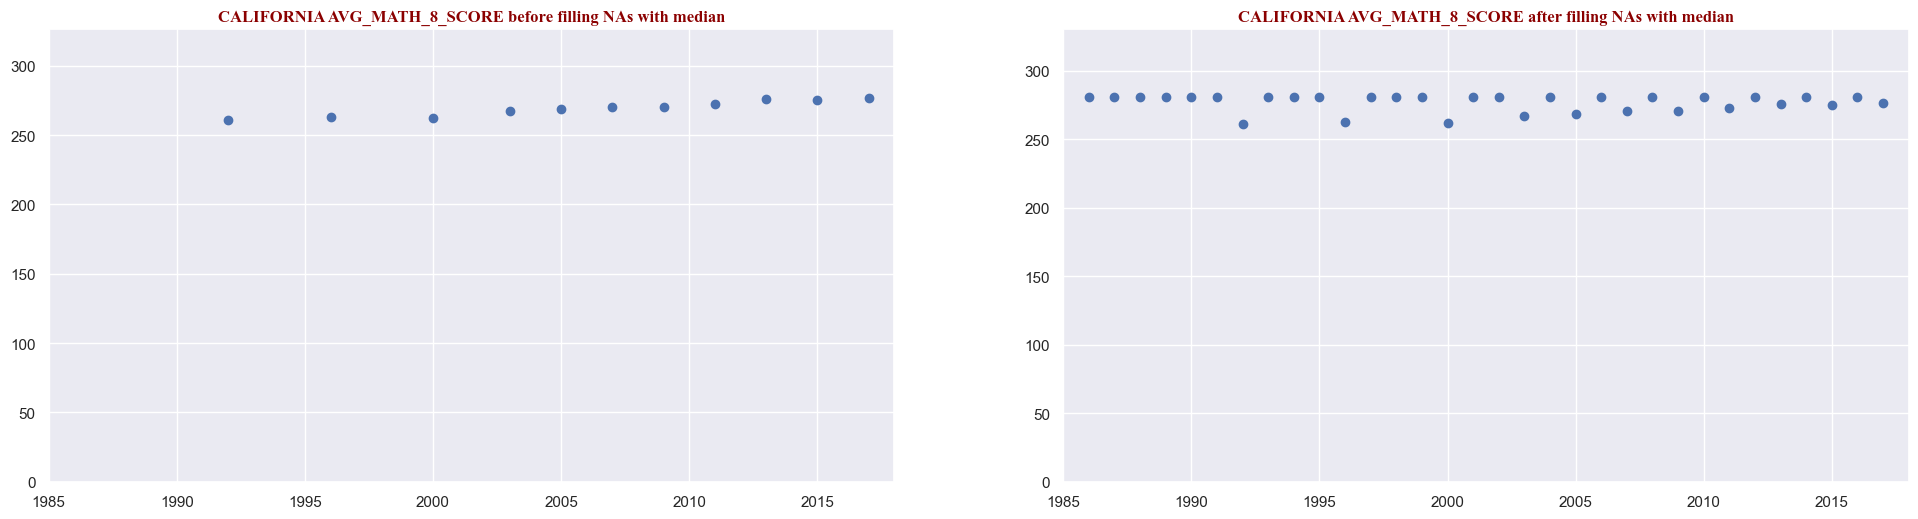

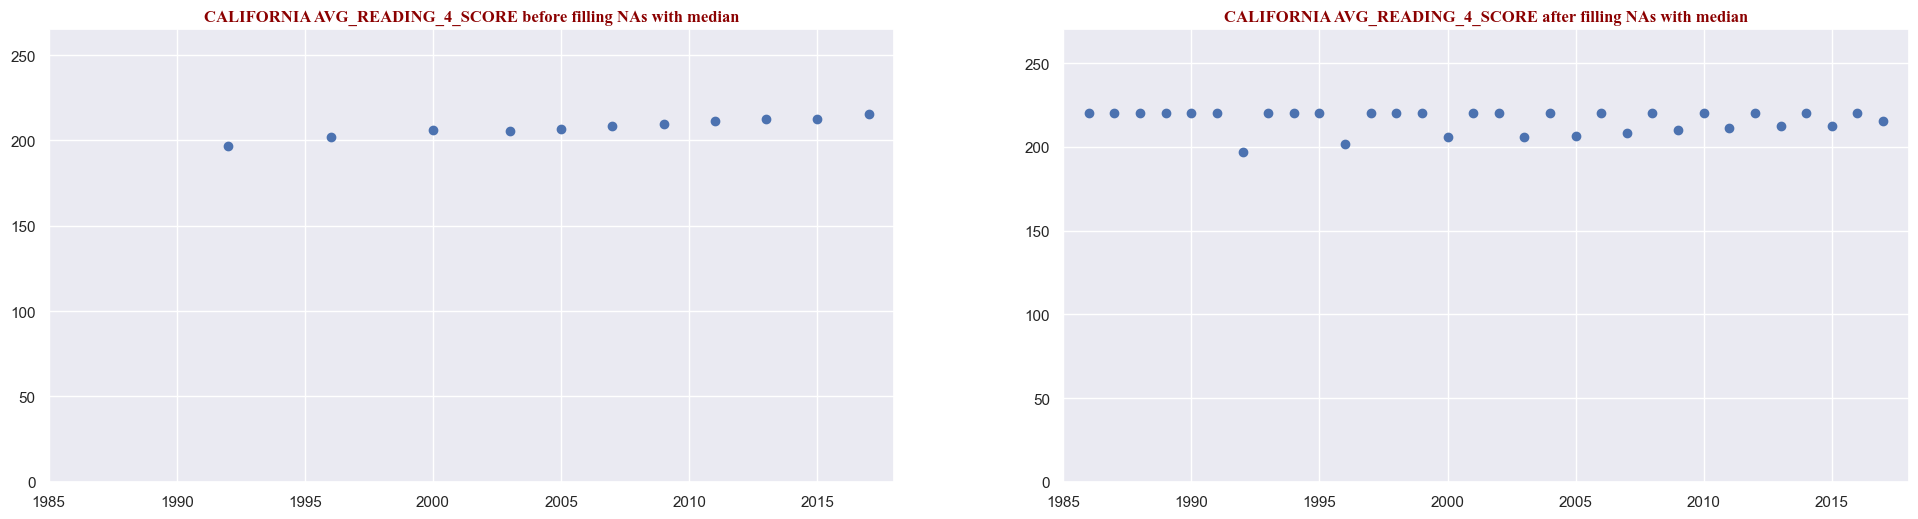

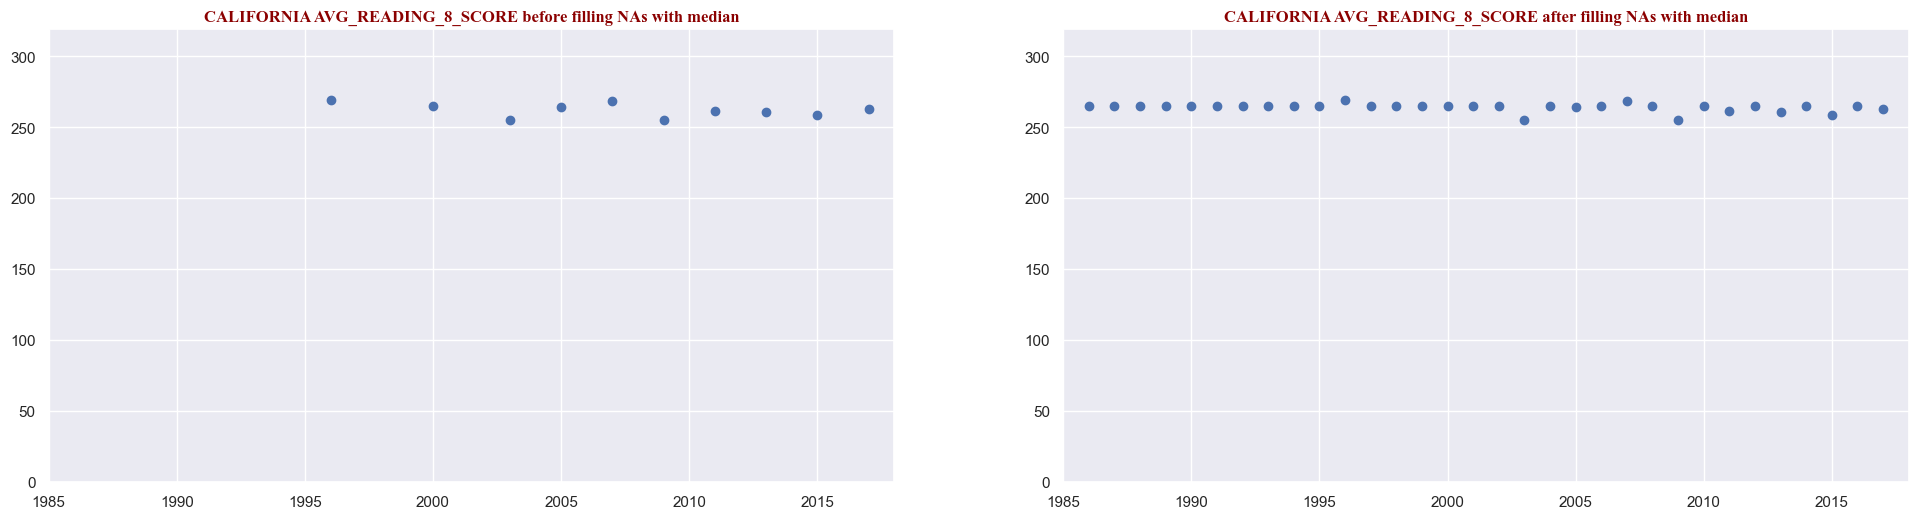

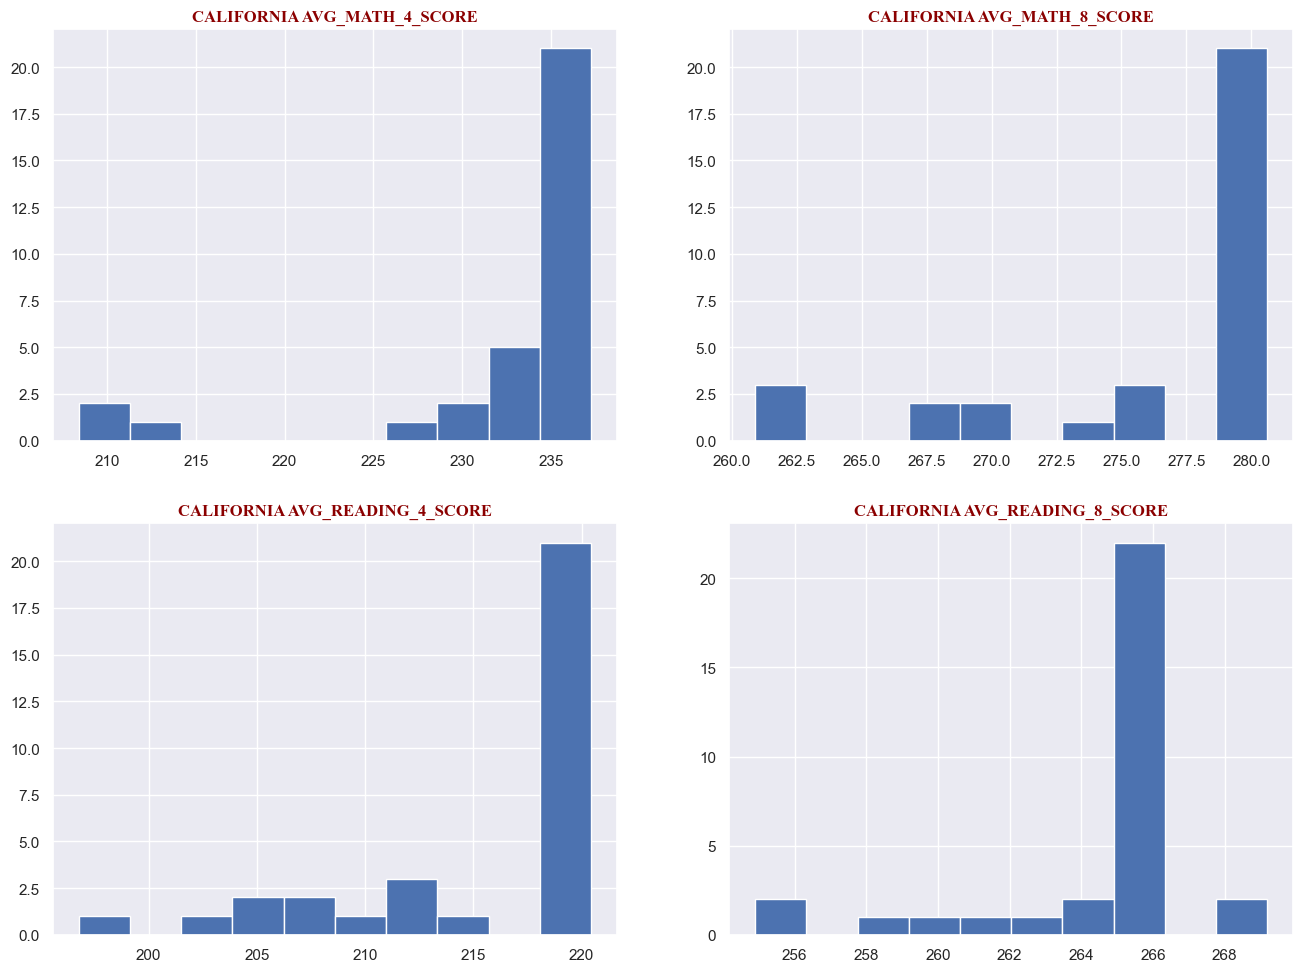

In [142]:
dmedian = df.copy()
columns = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for column in columns:
    dmedian[column].fillna(dmedian[column].median(),inplace=True)
    
display(df.loc[df['STATE']=='CALIFORNIA',columns].head(8))
display(df.loc[df['STATE']=='CALIFORNIA',columns].tail(6))
display(dmedian.loc[df['STATE']=='CALIFORNIA',columns].head(8))
display(dmedian.loc[df['STATE']=='CALIFORNIA',columns].tail(6))


x = df.YEAR.unique()
state = 'CALIFORNIA'

j=0
for column in columns: 
    y = [df.loc[df['STATE']==state, column],
         dmedian.loc[dmedian['STATE']==state, column]]
    plt.figure(figsize=(24,6))
    for i in range(2):  
        plt.subplot(1,2,i+1)
        if i ==0 :
            plt.title(state + ' '+ column + ' before filling NAs with median', fontdict=title_font)            
        elif i==1 :
            plt.title(state + ' '+ column + ' after filling NAs with median', fontdict=title_font)
        plt.axis(xmin = x[0]-1, xmax=x[-1]+1, ymin=0, ymax = y[i].max()+50)
        plt.scatter(x,y[i])       
    plt.show()       

i=1
plt.figure(figsize=(16,12))
for column in columns:
        plt.subplot(2,2,i)
        plt.title(state + ' '+ column , fontdict=title_font)
        plt.hist(dmedian.loc[dfi['STATE']==state][column])
        i += 1
plt.show()

    

---
***Lineer enterpolasyon yontemi***

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
1986_CALIFORNIA,nan,nan,nan,nan
1987_CALIFORNIA,nan,nan,nan,nan
1988_CALIFORNIA,nan,nan,nan,nan
1989_CALIFORNIA,nan,nan,nan,nan
1990_CALIFORNIA,nan,nan,nan,nan
1991_CALIFORNIA,nan,nan,nan,nan
1992_CALIFORNIA,208.399,260.892,196.764,nan
1993_CALIFORNIA,nan,nan,nan,nan


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
2012_CALIFORNIA,nan,nan,nan,nan
2013_CALIFORNIA,233.654,275.901,212.546,260.448
2014_CALIFORNIA,nan,nan,nan,nan
2015_CALIFORNIA,231.549,275.325,212.678,258.768
2016_CALIFORNIA,nan,nan,nan,nan
2017_CALIFORNIA,232.263,276.638,215.422,262.521


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
1986_CALIFORNIA,208.328,252.188,207.964,258.860
1987_CALIFORNIA,208.328,252.188,207.964,258.860
1988_CALIFORNIA,208.328,252.188,207.964,258.860
1989_CALIFORNIA,208.328,252.188,207.964,258.860
1990_CALIFORNIA,208.328,252.188,207.964,258.860
1991_CALIFORNIA,208.328,252.188,207.964,258.860
1992_CALIFORNIA,208.399,260.892,196.764,265.520
1993_CALIFORNIA,224.932,274.480,220.852,261.684


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
2012_CALIFORNIA,242.815,285.982,223.535,267.490
2013_CALIFORNIA,233.654,275.901,212.546,260.448
2014_CALIFORNIA,245.028,286.046,225.003,271.746
2015_CALIFORNIA,231.549,275.325,212.678,258.768
2016_CALIFORNIA,245.357,284.902,227.032,259.945
2017_CALIFORNIA,232.263,276.638,215.422,262.521


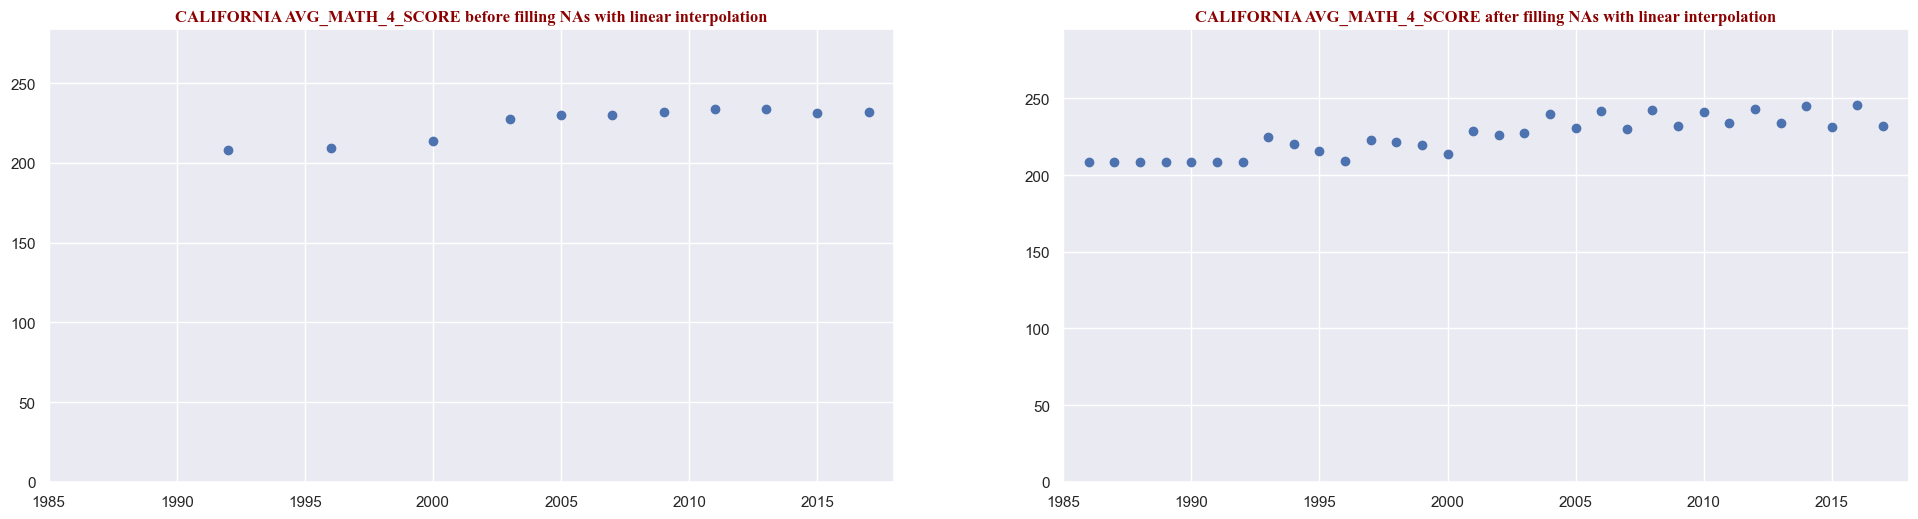

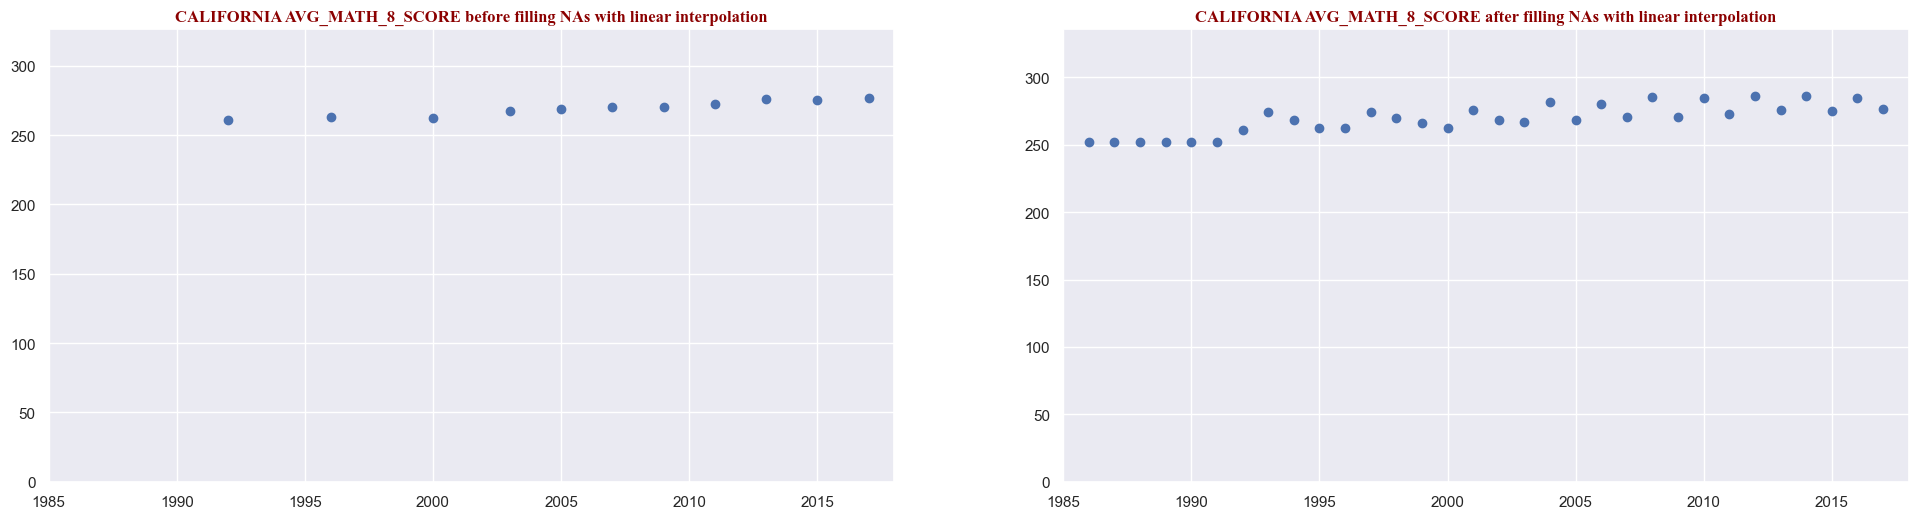

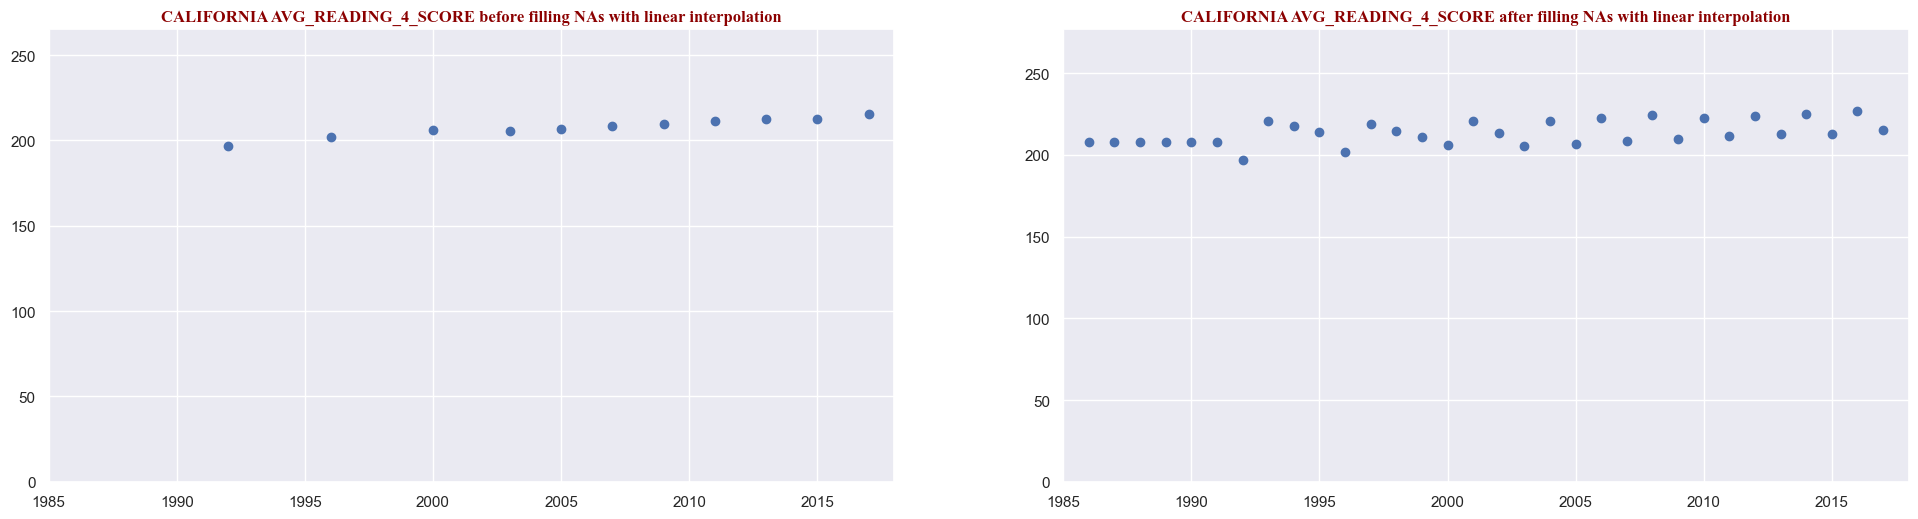

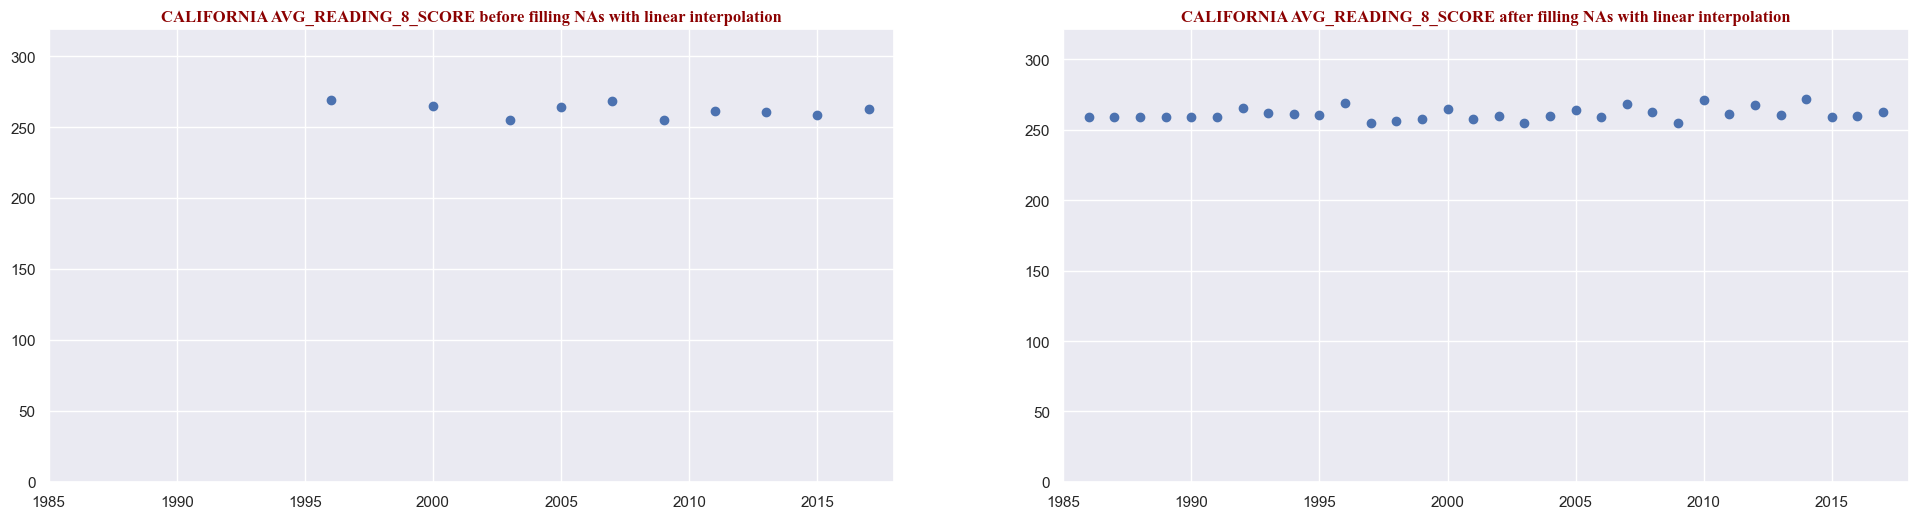

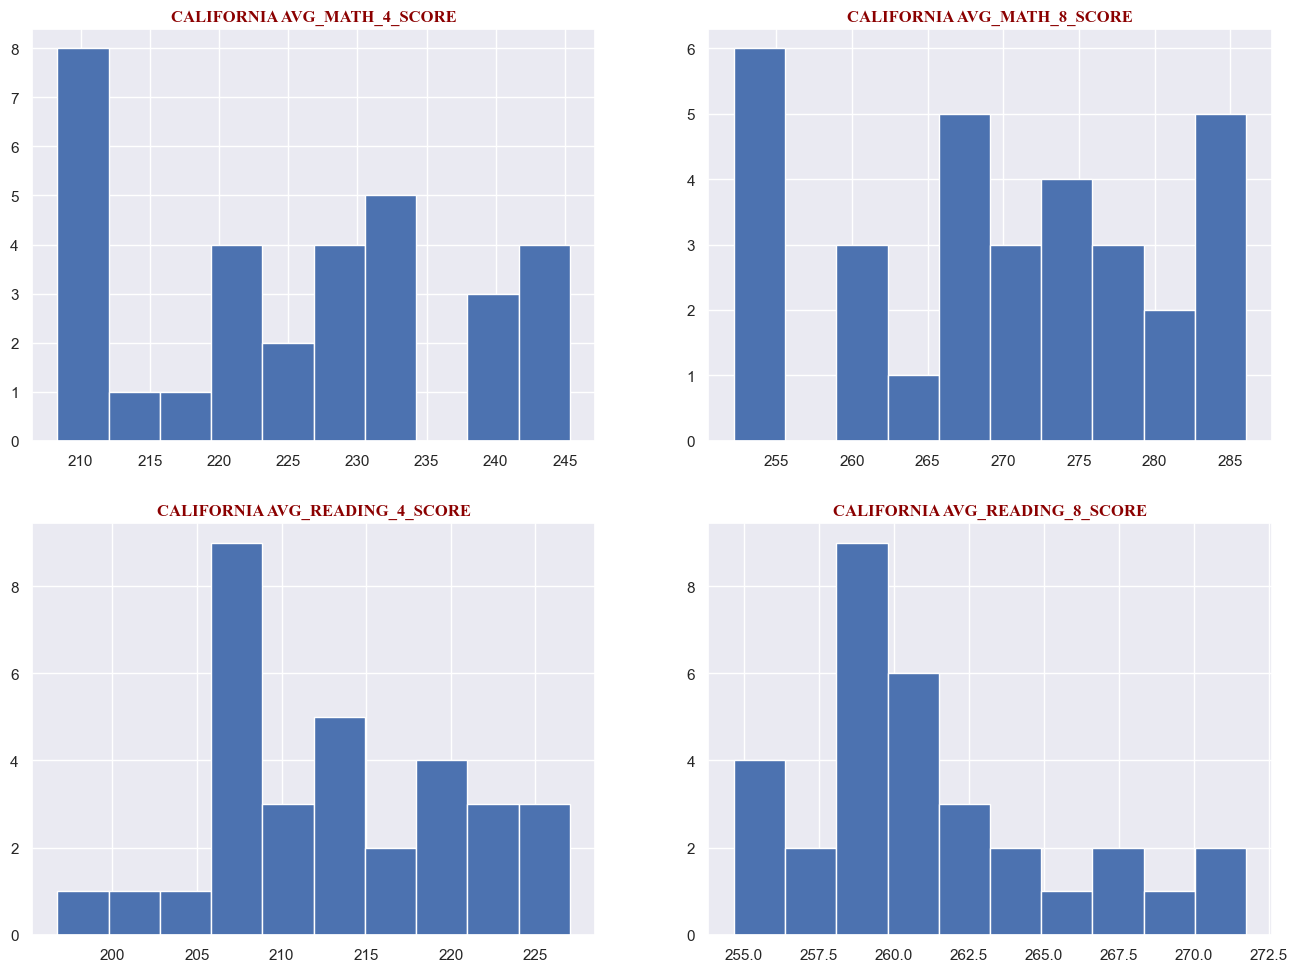

In [143]:
dl = df.copy()
columns = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for column in columns:
    dl[column].interpolate(method='linear', limit_direction = 'both',inplace=True)
    
display(df.loc[df['STATE']=='CALIFORNIA',columns].head(8))
display(df.loc[df['STATE']=='CALIFORNIA',columns].tail(6))
display(dl.loc[df['STATE']=='CALIFORNIA',columns].head(8))
display(dl.loc[df['STATE']=='CALIFORNIA',columns].tail(6))


x = df.YEAR.unique()
state = 'CALIFORNIA'

j=0
for column in columns: 
    y = [df.loc[df['STATE']==state, column],
         dl.loc[dl['STATE']==state, column]]
    plt.figure(figsize=(24,6))
    for i in range(2):  
        plt.subplot(1,2,i+1)
        if i ==0 :
            plt.title(state + ' '+ column + ' before filling NAs with linear interpolation', fontdict=title_font)            
        elif i==1 :
            plt.title(state + ' ' + column + ' after filling NAs with linear interpolation', fontdict=title_font)
        plt.axis(xmin = x[0]-1, xmax=x[-1]+1, ymin=0, ymax = y[i].max()+50)
        plt.scatter(x,y[i])       
    plt.show()     
    

i=1
plt.figure(figsize=(16,12))
for column in columns:
        plt.subplot(2,2,i)
        plt.title(state + ' '+ column , fontdict=title_font)
        plt.hist(dl.loc[dfi['STATE']==state][column])
        i += 1
plt.show()



---
***State bazinda ortalama yontemi***

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
1986_CALIFORNIA,nan,nan,nan,nan
1987_CALIFORNIA,nan,nan,nan,nan
1988_CALIFORNIA,nan,nan,nan,nan
1989_CALIFORNIA,nan,nan,nan,nan
1990_CALIFORNIA,nan,nan,nan,nan
1991_CALIFORNIA,nan,nan,nan,nan
1992_CALIFORNIA,208.399,260.892,196.764,nan
1993_CALIFORNIA,nan,nan,nan,nan
1994_CALIFORNIA,nan,nan,nan,nan


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
2006_CALIFORNIA,nan,nan,nan,nan
2007_CALIFORNIA,230.034,270.382,208.522,268.159
2008_CALIFORNIA,nan,nan,nan,nan
2009_CALIFORNIA,231.675,270.449,209.762,254.895
2010_CALIFORNIA,nan,nan,nan,nan
2011_CALIFORNIA,234.165,272.770,211.359,261.285
2012_CALIFORNIA,nan,nan,nan,nan
2013_CALIFORNIA,233.654,275.901,212.546,260.448
2014_CALIFORNIA,nan,nan,nan,nan


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
1986_CALIFORNIA,225.660,269.355,207.912,261.903
1987_CALIFORNIA,225.660,269.355,207.912,261.903
1988_CALIFORNIA,225.660,269.355,207.912,261.903
1989_CALIFORNIA,225.660,269.355,207.912,261.903
1990_CALIFORNIA,225.660,269.355,207.912,261.903
1991_CALIFORNIA,225.660,269.355,207.912,261.903
1992_CALIFORNIA,208.399,260.892,196.764,261.903
1993_CALIFORNIA,225.660,269.355,207.912,261.903


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,
2012_CALIFORNIA,225.660,269.355,207.912,261.903
2013_CALIFORNIA,233.654,275.901,212.546,260.448
2014_CALIFORNIA,225.660,269.355,207.912,261.903
2015_CALIFORNIA,231.549,275.325,212.678,258.768
2016_CALIFORNIA,225.660,269.355,207.912,261.903
2017_CALIFORNIA,232.263,276.638,215.422,262.521


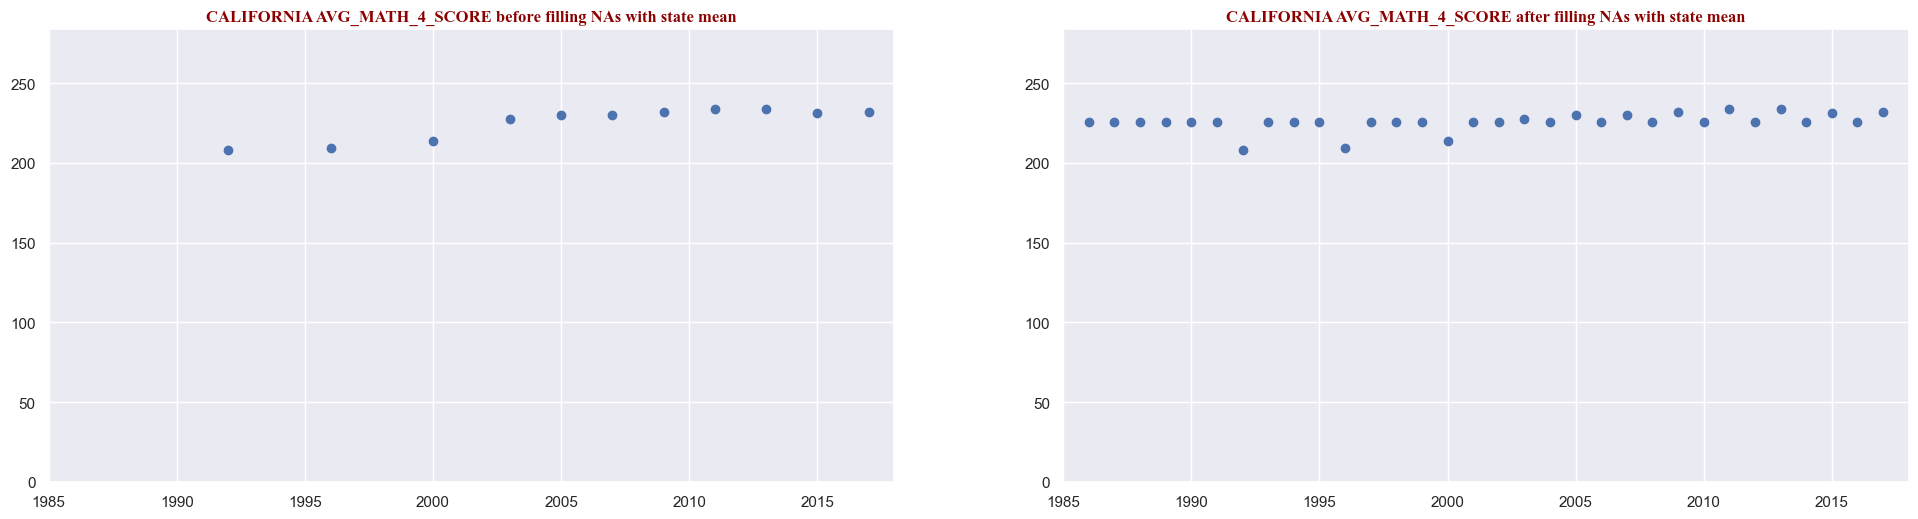

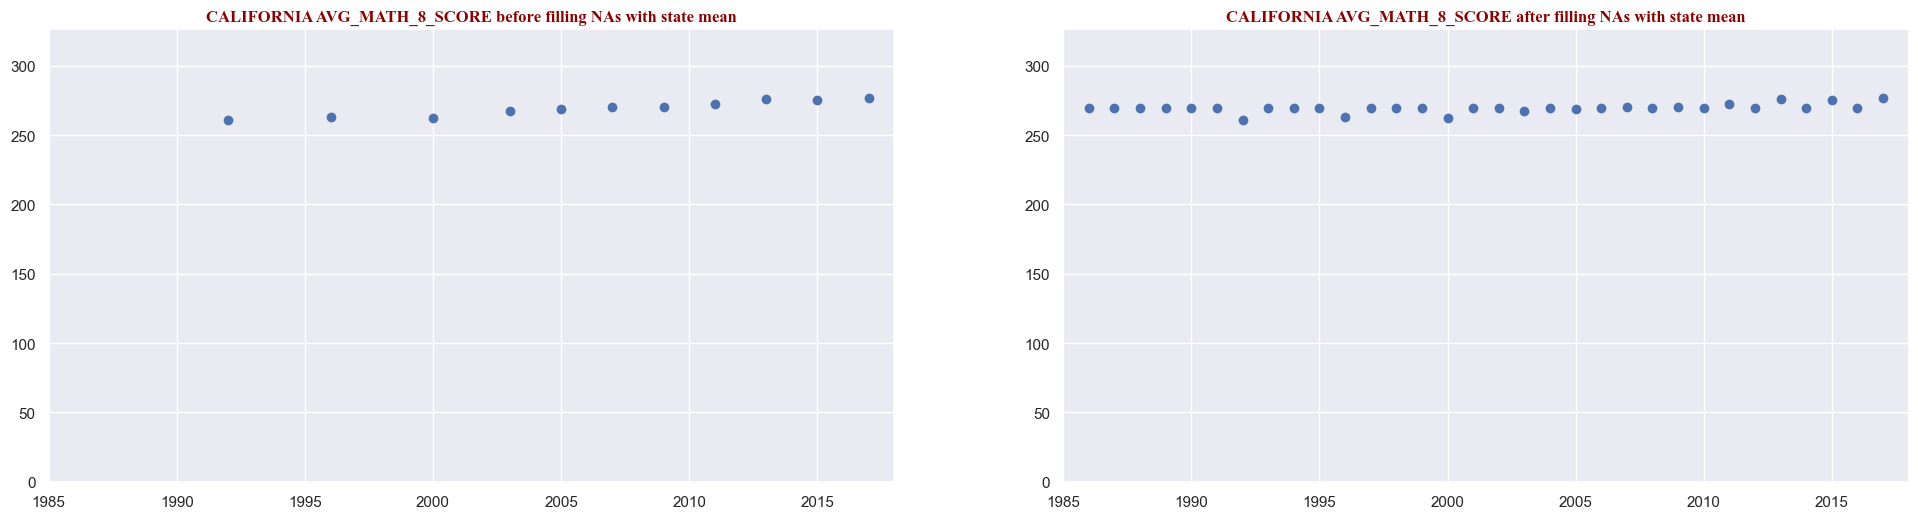

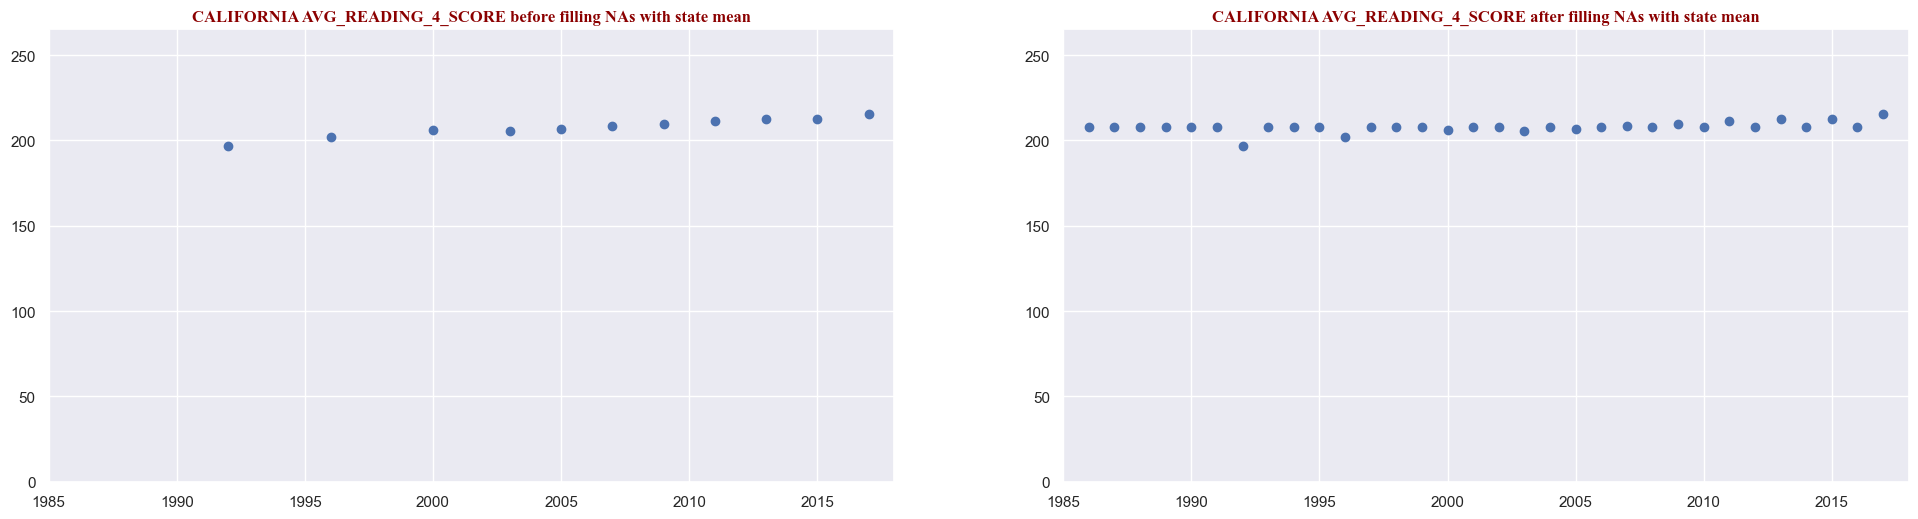

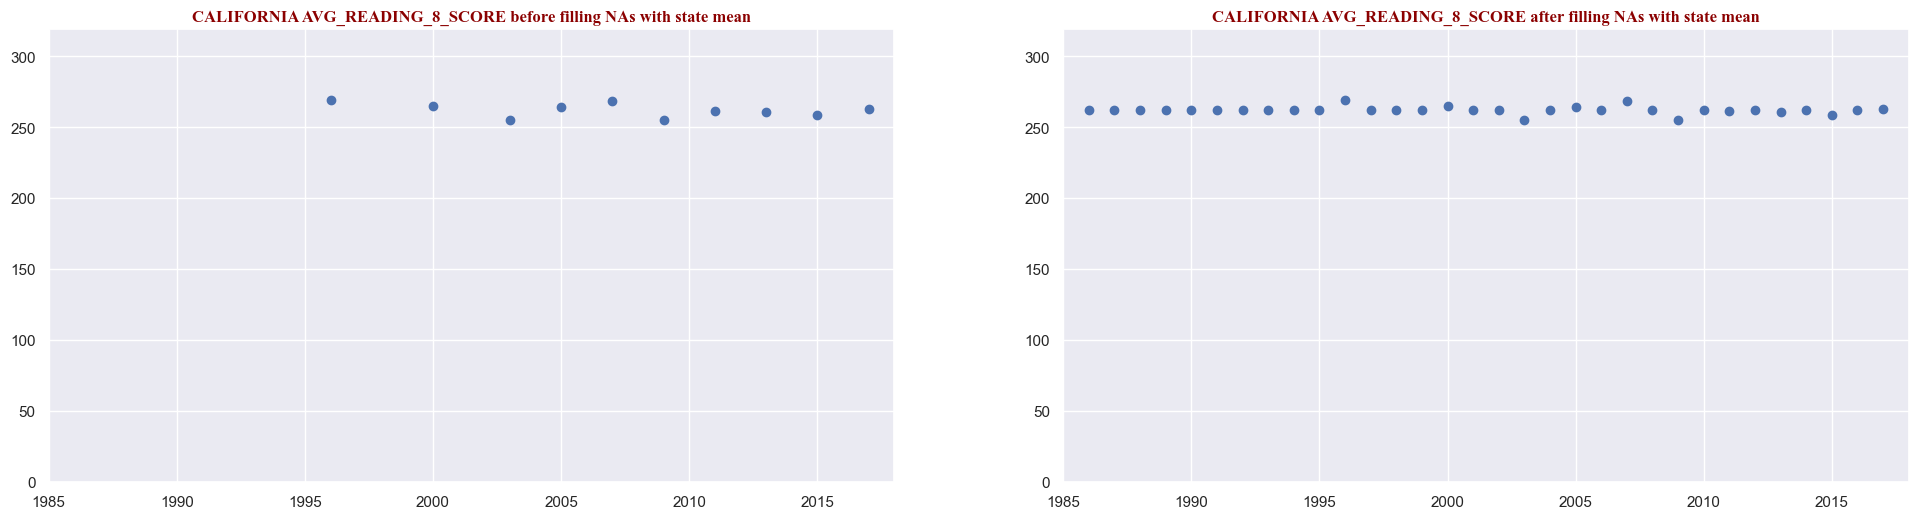

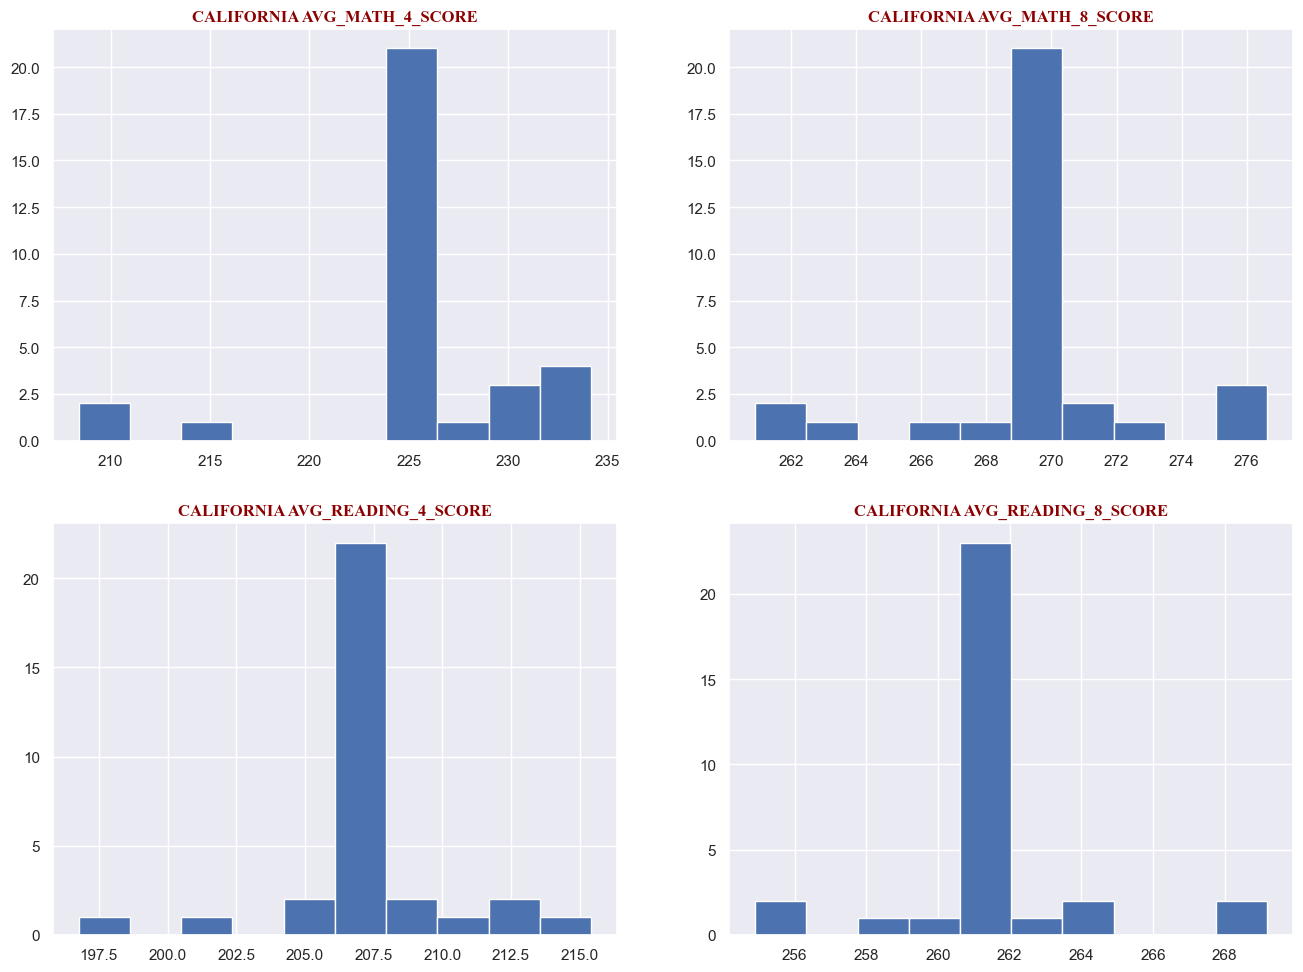

In [144]:
dmeanstate = df.copy()
columns = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
# fill the null values with means of the columns

for column in columns:
    # check if it is suitable to calculate its mean; float 
    if dmeanstate[column].dtype == 'float64' :
        for state in dmeanstate.STATE.unique():
            dmeanstate.loc[dmeanstate['STATE']==state,column] = dmeanstate.loc[dmeanstate['STATE']==state, column].fillna(dmeanstate.loc[dmeanstate['STATE']==state, column].mean())


display(df.loc[df['STATE']=='CALIFORNIA',columns].head(18))
display(df.loc[df['STATE']=='CALIFORNIA',columns].tail(12))
display(dmeanstate.loc[dmeanstate['STATE']=='CALIFORNIA',columns].head(8))
display(dmeanstate.loc[dmeanstate['STATE']=='CALIFORNIA',columns].tail(6))


x = df.YEAR.unique()
state = 'CALIFORNIA'

j=0
for column in columns: 
    y = [df.loc[df['STATE']==state, column],
         dmeanstate.loc[dmeanstate['STATE']==state, column]]
    plt.figure(figsize=(24,6))
    for i in range(2):  
        plt.subplot(1,2,i+1)
        if i ==0 :
            plt.title(state + ' '+ column + ' before filling NAs with state mean', fontdict=title_font)            
        elif i==1 :
            plt.title(state + ' '+ column + ' after filling NAs with state mean', fontdict=title_font)
        plt.axis(xmin = x[0]-1, xmax=x[-1]+1, ymin=0, ymax = y[i].max()+50)
        plt.scatter(x,y[i])       
    plt.show()   
    
i=1
plt.figure(figsize=(16,12))
for column in columns:
        plt.subplot(2,2,i)
        plt.title(state + ' '+ column , fontdict=title_font)
        plt.hist(dmeanstate.loc[dfi['STATE']==state][column])
        i += 1
plt.show()

